In [1]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [2]:
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')
county21 = recent_census21.str.split(',').str[0]

county21

C:\Users\yhuan\AppData\Local\Temp/ipykernel_24392/1531365318.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')


0               Georgia
1        Appling County
2       Atkinson County
3          Bacon County
4          Baker County
             ...       
155    Whitfield County
156       Wilcox County
157       Wilkes County
158    Wilkinson County
159        Worth County
Name: Unnamed: 0, Length: 160, dtype: object

In [3]:
# 2021 data
data21 = recent_census[['2020','2021']]

census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

census_20

0      10725800
1         18428
2          8301
3         11123
4          2844
         ...   
155      102727
156        8731
157        9556
158        8844
159       20719
Name: 2020, Length: 160, dtype: int64

In [4]:
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

census_21

0      10799566
1         18488
2          8391
3         11079
4          2819
         ...   
155      102848
156        8739
157        9513
158        8831
159       20554
Name: 2021, Length: 160, dtype: int64

In [5]:
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

census21_df= organized_21.set_index("County")

census21_df

,2020,2021
County,,
Georgia,10725800,10799566
Appling County,18428,18488
Atkinson County,8301,8391
Bacon County,11123,11079
Baker County,2844,2819
...,...,...
Whitfield County,102727,102848
Wilcox County,8731,8739
Wilkes County,9556,9513


In [6]:
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# file_2_df
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
file_2_ga

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020
398,40,3,5,13,0,Georgia,Georgia,9687653,9688737,9712209,...,3.041427,3.798407,1.747055,4.060100,5.814395,7.200931,5.948622,5.638213,6.502924,4.765012
399,50,3,5,13,1,Georgia,Appling County,18236,18237,18337,...,3.098163,-9.988871,-4.843669,2.931914,-4.662637,-0.813824,-1.626457,4.109774,-8.340780,-2.941657
400,50,3,5,13,3,Georgia,Atkinson County,8375,8380,8363,...,-9.329028,-18.178535,-4.116970,-14.082797,7.737879,-11.188643,-7.009063,6.505632,-16.613495,8.402353
401,50,3,5,13,5,Georgia,Bacon County,11096,11097,11062,...,7.833603,-5.021971,0.089582,0.715820,1.071285,2.400747,-9.077964,-10.313901,-2.342976,-7.590133
402,50,3,5,13,7,Georgia,Baker County,3451,3447,3431,...,-38.267576,11.974255,-8.933889,-18.694407,-27.782065,-1.881763,-3.468390,-25.932448,-16.297262,-24.592888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,50,3,5,13,313,Georgia,Whitfield County,102599,102602,102740,...,-5.533701,-5.965944,-7.713370,-1.963739,-0.193555,1.134970,-7.072937,-4.851221,-1.439719,-7.111897
554,50,3,5,13,315,Georgia,Wilcox County,9255,9251,9313,...,-6.572922,-18.889556,1.324284,-14.569315,12.371823,-17.704073,-7.380493,4.213163,-21.390374,-8.299725
555,50,3,5,13,317,Georgia,Wilkes County,10593,10593,10389,...,-13.676706,-12.202923,-10.187775,4.424111,0.301705,-7.600709,9.859728,3.449500,-4.588559,-0.822073
556,50,3,5,13,319,Georgia,Wilkinson County,9563,9569,9528,...,-14.360382,7.303906,-11.569897,-8.581849,-19.495725,-3.425225,-5.674864,10.246130,-7.914832,-9.240478


In [7]:
# # trimming df to just populations and name
# ga_census_estimate_population = file_2_ga[["CTYNAME", "POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE2020"]]
# ga_census_estimate_population.reset_index()
# ga_census_estimate_population = ga_census_estimate_population.rename(columns={"POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", 
#                                              "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019", "POPESTIMATE2020": "2020"})
# ga_census_estimate_population

In [8]:
# this is Yi's 
# ga_census_estimate = file_2_ga[["CTYNAME", "POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE2020","NPOPCHG_2017","NPOPCHG_2018","NPOPCHG_2019","NPOPCHG_2020","NETMIG2017","NETMIG2018","NETMIG2019","NETMIG2020"]]
# ga_census_estimate.reset_index()


In [9]:
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})
ga_census_20 = ga_census_estimate_population.set_index("County")
ga_census_20

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047
...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769


In [10]:
years = ga_census_20.keys()

years


Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [11]:
# pick x numbers randomly
randomNumbers = []
i = 0
while i < 10:
    
    num = random.randint(1, 159)
    if num not in randomNumbers:
        randomNumbers.append(num)
        print(randomNumbers)
        i = i + 1

[120]
[120, 128]
[120, 128, 154]
[120, 128, 154, 96]
[120, 128, 154, 96, 60]
[120, 128, 154, 96, 60, 40]
[120, 128, 154, 96, 60, 40, 55]
[120, 128, 154, 96, 60, 40, 55, 119]
[120, 128, 154, 96, 60, 40, 55, 119, 43]
[120, 128, 154, 96, 60, 40, 55, 119, 43, 77]


In [12]:
# ga_census_estimate_population.iloc[86]

countyDataDictionary = {}

for x in randomNumbers:

    countyDataDictionary[x] = ga_census_20.iloc[x]
countyDataDictionary


{120: 2010    7668
 2011    7570
 2012    7310
 2013    7202
 2014    7315
 2015    7153
 2016    7150
 2017    6974
 2018    6826
 2019    6806
 Name: Randolph County, dtype: int64,
 128: 2010    6099
 2011    6065
 2012    6106
 2013    5555
 2014    5882
 2015    5969
 2016    6129
 2017    6329
 2018    6434
 2019    6649
 Name: Stewart County, dtype: int64,
 154: 2010    27201
 2011    27401
 2012    27626
 2013    27831
 2014    28025
 2015    28389
 2016    28793
 2017    29429
 2018    29893
 2019    30601
 Name: White County, dtype: int64,
 96: 2010    14644
 2011    14452
 2012    14297
 2013    13973
 2014    13822
 2015    13689
 2016    13483
 2017    13255
 2018    13153
 2019    12934
 Name: Macon County, dtype: int64,
 60: 2010     925622
 2011     947582
 2012     973464
 2013     981844
 2014     992321
 2015    1005752
 2016    1023816
 2017    1039996
 2018    1051516
 2019    1065019
 Name: Fulton County, dtype: int64,
 40: 2010    23436
 2011    23753
 2012    235

2010    7668
2011    7570
2012    7310
2013    7202
2014    7315
2015    7153
2016    7150
2017    6974
2018    6826
2019    6806
Name: Randolph County, dtype: int64
2010    6099
2011    6065
2012    6106
2013    5555
2014    5882
2015    5969
2016    6129
2017    6329
2018    6434
2019    6649
Name: Stewart County, dtype: int64
2010    27201
2011    27401
2012    27626
2013    27831
2014    28025
2015    28389
2016    28793
2017    29429
2018    29893
2019    30601
Name: White County, dtype: int64
2010    14644
2011    14452
2012    14297
2013    13973
2014    13822
2015    13689
2016    13483
2017    13255
2018    13153
2019    12934
Name: Macon County, dtype: int64
2010     925622
2011     947582
2012     973464
2013     981844
2014     992321
2015    1005752
2016    1023816
2017    1039996
2018    1051516
2019    1065019
Name: Fulton County, dtype: int64
2010    23436
2011    23753
2012    23593
2013    23304
2014    23064
2015    22961
2016    22882
2017    22675
2018    22572
201

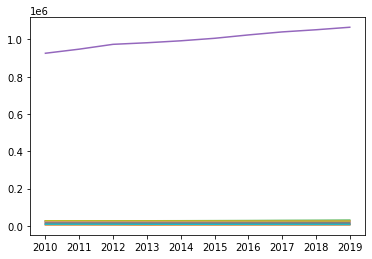

In [13]:
label=[]

for x in countyDataDictionary:
    print(countyDataDictionary[x])
    label.append(x)
    plt.plot(years, countyDataDictionary[x], label = label)
# plt.legend(handles=[x], loc="best")
# plt.yscale('log')
plt.show()

In [14]:
# # 2021 data
recent_census = data21[['2020','2021']]

census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

census_21

0      10799566
1         18488
2          8391
3         11079
4          2819
         ...   
155      102848
156        8739
157        9513
158        8831
159       20554
Name: 2021, Length: 160, dtype: int64

In [15]:
years2 = census21_df.keys()

years2

Index(['2020', '2021'], dtype='object')

In [16]:
# pick x numbers randomly
randomNumbers2 = []
i = 0
while i < 10:
    
    num2 = random.randint(1, 159)
    if num2 not in randomNumbers2:
        randomNumbers2.append(num2)
        print(randomNumbers2)
        i = i + 1

[93]
[93, 16]
[93, 16, 37]
[93, 16, 37, 6]
[93, 16, 37, 6, 76]
[93, 16, 37, 6, 76, 152]
[93, 16, 37, 6, 76, 152, 59]
[93, 16, 37, 6, 76, 152, 59, 51]
[93, 16, 37, 6, 76, 152, 59, 51, 61]
[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]


2020    33596
2021    34278
Name: Lumpkin County, dtype: int64
2020    81378
2021    82442
Name: Bulloch County, dtype: int64
2020    17232
2021    17225
Name: Cook County, dtype: int64
2020    18069
2021    18562
Name: Banks County, dtype: int64
2020    164242
2021    166829
Name: Houston County, dtype: int64
2020    2350
2021    2367
Name: Webster County, dtype: int64
2020    23429
2021    23785
Name: Franklin County, dtype: int64
2020    65150
2021    66741
Name: Effingham County, dtype: int64
2020    31429
2021    32026
Name: Gilmer County, dtype: int64
2020    9643
2021    9618
Name: Irwin County, dtype: int64


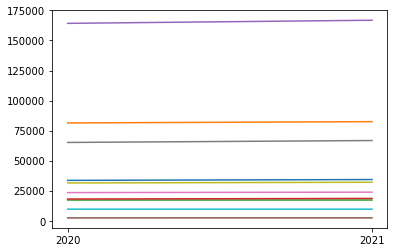

In [17]:
countyDataDictionary2 = {}

for x in randomNumbers2:

    countyDataDictionary2[x] = census21_df.iloc[x]        

for x in countyDataDictionary2:
    print(countyDataDictionary2[x])
    label.append(x)
    plt.plot(years2, countyDataDictionary2[x])
# plt.legend(label ="key", loc="best")
# plt.yscale('log')
plt.show()

In [18]:
ga_census_20
census21_df


,2020,2021
County,,
Georgia,10725800,10799566
Appling County,18428,18488
Atkinson County,8301,8391
Bacon County,11123,11079
Baker County,2844,2819
...,...,...
Whitfield County,102727,102848
Wilcox County,8731,8739
Wilkes County,9556,9513


In [19]:
census21_df

,2020,2021
County,,
Georgia,10725800,10799566
Appling County,18428,18488
Atkinson County,8301,8391
Bacon County,11123,11079
Baker County,2844,2819
...,...,...
Whitfield County,102727,102848
Wilcox County,8731,8739
Wilkes County,9556,9513


In [20]:
# merge_census = ga_census_20.merge(census21_df,how ='left', on ='CTYNAME')

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')


column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

merge_census = merge_census_raw.reindex(columns=column_names)

merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


In [22]:
year_merge = merge_census.keys()

year_merge

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

In [23]:
# pick x numbers randomly
randomNumbers_merge = []
i = 0
while i < 10:
    
    num_merge = random.randint(1, 159)
    if num2 not in randomNumbers_merge:
        randomNumbers_merge.append(num_merge)
        print(randomNumbers2)
        i = i + 1

[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]
[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]
[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]
[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]
[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]
[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]
[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]
[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]
[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]
[93, 16, 37, 6, 76, 152, 59, 51, 61, 77]


2010    127939
2011    129390
2012    130614
2013    132980
2014    135191
2015    138217
2016    140561
2017    143218
2018    146063
2019    148504
2020    146653
2021    149956
Name: Coweta County, dtype: int64
2010    8983
2011    8836
2012    8560
2013    8522
2014    8399
2015    8353
2016    8263
2017    8268
2018    8179
2019    8164
2020    7986
2021    7856
Name: Twiggs County, dtype: int64
2010    2512
2011    2454
2012    2407
2013    2368
2014    2287
2015    2277
2016    2323
2017    2334
2018    2254
2019    2300
2020    2224
2021    2243
Name: Quitman County, dtype: int64
2010    62772
2011    65210
2012    64482
2013    62438
2014    64217
2015    61762
2016    61672
2017    61819
2018    60887
2019    62813
2020    65220
2021    65711
Name: Liberty County, dtype: int64
2010    12577
2011    12576
2012    12567
2013    12474
2014    12395
2015    12351
2016    12250
2017    12236
2018    12273
2019    12345
2020    12100
2021    12153
Name: Crawford County, dtype: int6

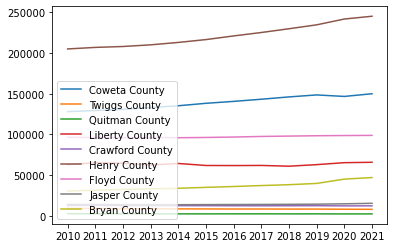

In [35]:
countyDataDictionary_merge = {}
county_names= []

for x in randomNumbers_merge:

    countyDataDictionary_merge[x] = merge_census.iloc[x]        

for x in countyDataDictionary_merge:
    print(countyDataDictionary_merge[x])
    
    county_names.append(countyDataDictionary_merge[x].name)
    plt.plot(year_merge, countyDataDictionary_merge[x])
    
# for col in df:
#     plt.plot(df.index, df[col])
# plt.legend(df.columns)
# plt.show()

county_df = pd.DataFrame({"data":countyDataDictionary_merge})

# print(county_df)

plt.legend(county_names,loc="lower left")
# plt.yscale('log')
plt.show()

In [45]:
merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


Bacon County
Appling County
Taylor County
Bibb County
Jackson County
Banks County
Mitchell County
Bryan County
Atkinson County
Bleckley County


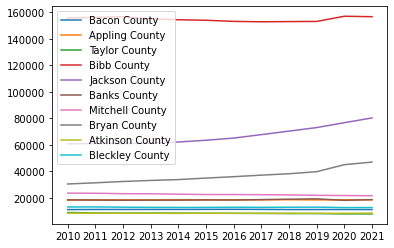

In [48]:
samples_df = merge_census.sample(10)

for row in samples_df.index:
    print(row)
    
    plt.plot(samples_df.loc[row,:])

plt.legend(samples_df.index)
plt.show()

In [52]:
samples_df.T

County,Bacon County,Appling County,Taylor County,Bibb County,Jackson County,Banks County,Mitchell County,Bryan County,Atkinson County,Bleckley County
2010,11062,18337,8853,155878,60706,18404,23502,30404,8363,13033
2011,11150,18459,8513,156297,60985,18245,23399,31300,8359,13077
2012,11152,18382,8434,156701,60860,18128,23086,32293,8254,12888
2013,11174,18367,8456,155138,61286,18216,22990,33082,8263,12742
2014,11178,18469,8453,154447,62125,18220,22712,33726,8211,12706
2015,11225,18420,8316,154068,63439,18375,22449,34860,8331,12710
2016,11268,18443,8256,153212,65091,18292,22443,35916,8293,12868
2017,11204,18447,8181,152920,67681,18607,22313,37091,8257,12769
2018,11096,18538,8067,153069,70347,18918,22156,38151,8344,12833
2019,11098,18389,8051,153191,73015,19175,21846,39692,8269,12923


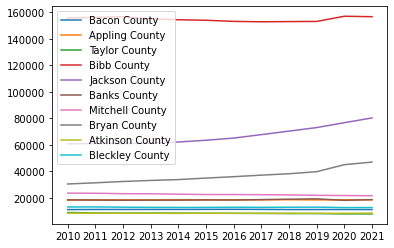

In [53]:
plt.plot(samples_df.T);
plt.legend(samples_df.index)
plt.show()

In [ ]:

# years = ga_census_estimate_population.keys()
# # Plot the unemployment values for a single country
# # country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014","2015",
# #                                                                   "2016","2017","2018","2019","2020"]], 
# #                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])


In [ ]:
# country_one, = plt.plot(years, ga_census_estimate_population.loc['Liberty County',["2010","2011","2012","2013","2014","2015",
#                                                                   "2016","2017","2018","2019","2020"]], 
#                         color="green")

# plt.show()

In [ ]:
# ga_census_estimate_population.loc[:,["2010","2011","2012","2013","2014","2015",
#                                                                   "2016","2017","2018","2019","2020"]]
# ga_census_estimate_population.loc["Georgia"]


# # transposed = ga_census_estimate_population.T
# # ax.plot(df_pop_density['Country'],
# #          df_pop_density['Area(100kmsq)'],
# #          marker='o', linewidth=2, label='Area')


# country_one, = plt.plot(years, ga_census_estimate_population.loc["Chatham County"], label="Chatham County")
# country_one, = plt.plot(years, ga_census_estimate_population.loc["Liberty County"], label="Liberty County")


# plt.xticks(rotation=90)
# plt.show()

In [ ]:

# for x in countyDataDictionary.keys():
# #     print(countyDataDictionary[x])
#     plt.plot(years, countyDataDictionary[x])
    
# plt.xticks(rotation=90)    
# plt.show()
